<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/TP%20DRIVER%20L298/Stepper_Driver_L298N_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

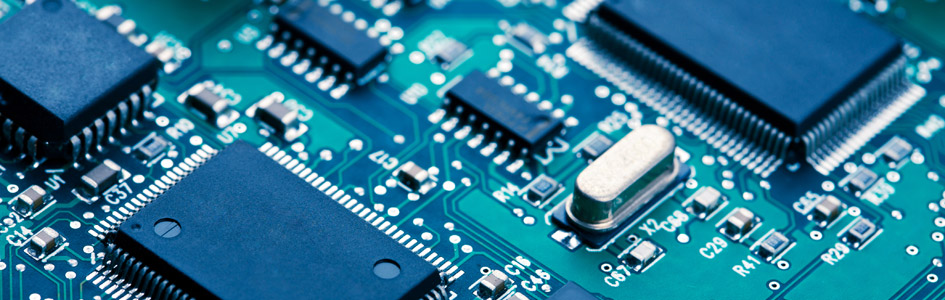

#Motores Paso a Paso – Stepper Driver

***Motores Paso a Paso – L298N Driver***


¿Que necesitamos?

1. Placa Arduino
2. Motor NEMA
3. Driver de control motor paso a paso. (Driver L298N )
4. Fuente de alimentación

#¿Como funciona un L298N?

El driver L298N es en realidad un doble puente H, lo que nos permite controlar dos motores DC, o un motor de pasos. En este caso lo usaremos para el control de un motor de pasos NEMA.

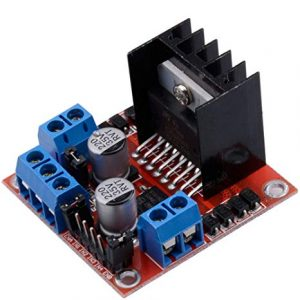

El driver dispone de 4 entradas que controlan las 4 salidas a las que vamos a conectar nuestro motor NEMA. Con el controlador L298N podemos controlar un solo motor paso a paso, ya que se necesitarán las 4 entradas para gobernar las 4 salidas que se dirigen al motor.

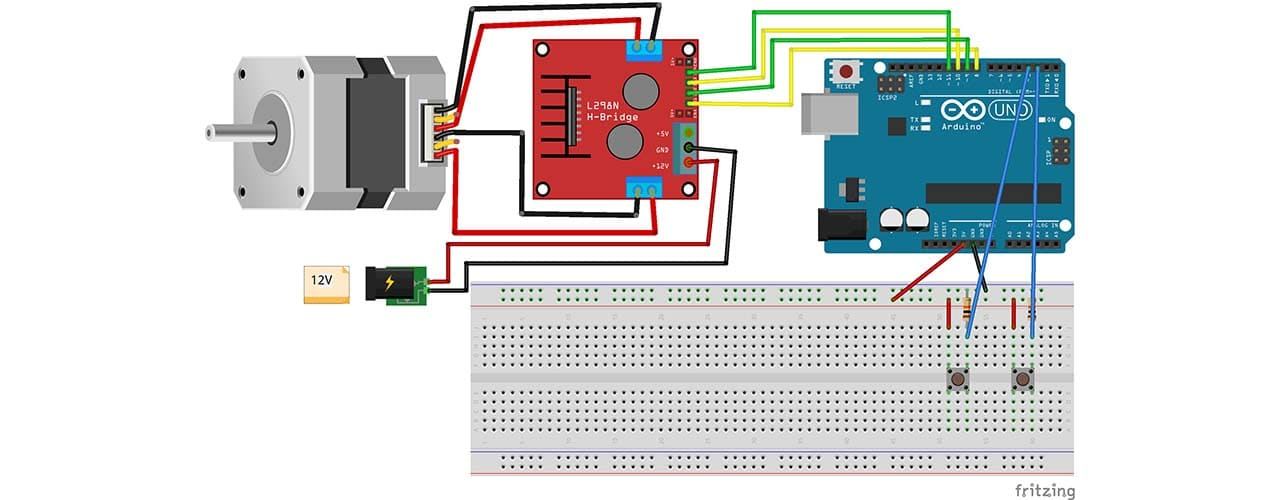


- La fuente de alimentación está representada por conexión externa, y estas deberían dar 12V (fuente de voltaje de 12 VDC.)

- Los cables que van de la placa Arduino a los pines de control, deben controlar cada una de las bobinas por parejas independientemente del orden que se conecten. Es decir, que los pines 8 y 9 controlarán una de las bobinas  y los pines 10 y 11 la segunda bobina. Si invertimos los cables de la bobina el motor funcionará, pero en sentido inverso.

- A veces el motor y el driver se calientan bastante, ya que este driver no posee un control de intensidad y trabaja con el voltaje nominal. En cambio, existen otros Drivers que poseen un potenciómetro y que podemos regular la intensidad que circulan por ellos para no saturarlos.

# Librería Stepper

Para el control de este tipo de motores, Arduino ya dispone de una librería llamada Stepper. Podriamos controlar nuestro motor definiendo todo el orden de las señales como hemos comentado en el tutorial anterior. Pero en lugar de eso vamos a simplificar el proceso, usando esta librería.

La librería Stepper solamente contiene 3 métodos, que son:

- Constructor Stepper  – Hay que definir el número de pasos, y los pines a los que se conecta.
- step() – Determina cuantos pasos se desplaza en cada momento.
- setSpeed() – Establece la velocidad de movimiento.

Un aspecto muy importante a tener en cuenta, es que el movimiento no dispone una referencia absoluta. Esto quiere decir que necesitaremos programar a mano el algoritmo en el que el motor alcanza las posiciones desde una referencia cero. El método step() realiza un movimiento relativo de pasos con respecto a su posición anterior.Es muy importante definir bien el numero de pasos por vuelta ( 200 pasos usualmente) del motor correctamente en el constructor, ya que tendrán que coincidir, el movimiento de 200 pasos en una vuelta completa.

# Código Arduino



In [ ]:
/*
Este código fue modificado por Néstor Vásquez


/*
 Stepper Motor Control - one revolution

 This program drives a unipolar or bipolar stepper motor.
 The motor is attached to digital pins 8 - 11 of the Arduino.

 The motor should revolve one revolution in one direction, then
 one revolution in the other direction.

 Created 11 Mar. 2007
 Modified 17 Sep. 2022

 */

#include <Stepper.h>

const int stepsPerRevolution = 200;  // change this to fit the number of steps per revolution
// for your motor

// initialize the stepper library on pins 8 through 11:
Stepper myStepper(stepsPerRevolution, 8, 9, 10, 11);

int pulse1=2;
int pulse2=3;
int value1;
int value2;

void setup() {
  // set the speed at 60 rpm:
  myStepper.setSpeed(300);
  pinMode(pulse1,INPUT);
  pinMode(pulse2,INPUT);
}

void loop() {
  value1= digitalRead(pulse1);
  value2= digitalRead(pulse2);
  if(value1==HIGH){
    myStepper.step(1);
    //delay(500); 
  }else{
    if(value2==HIGH){
        myStepper.step(-1);
        //delay(500);
    }else{
      myStepper.step(0);
    }
  }
}